# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


In [903]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import math
import random
import statsmodels.api as sm
from statsmodels.formula.api import ols


# pd.read_csv('case_study.csv')

In [904]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

In [905]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [906]:
df.shape

(34545, 358)

In [907]:
df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_PA300R2', '_PA30021', '_PASTRNG', '_PAREC1', '_PASTAE1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=358)

In [908]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [909]:
pd.set_option('display.max_columns', 360)


In [910]:
# your code here
df[df['_STATE'].isin([9,34,36])]
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Now check to see how large our subset df.

In [911]:
# your code here
df['_STATE'].value_counts()

36.0    12249
34.0    11708
9.0     10588
Name: _STATE, dtype: int64

In [912]:
df.shape


(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [913]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [914]:
zero_dict = {88:0, 
            77: np.nan,
            99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

In [915]:
df.shape

(34545, 358)

In [916]:
df.dropna(subset=['PHYSHLTH'], inplace=True)

In [917]:
# df['PHYSHLTH'] = df['PHYSHLTH'].replace(to_replace=88.0, value=0)

# #remove Nan missing values/look at the bias or demographic 

# #central tendency - mode - imputing categorical variables/get a sense about amount missing/or if it's dependent var
# #You can impute with relative probability in that case using np.random.choice

In [918]:
df.shape

(33747, 358)

In [919]:
# df['PHYSHLTH'] = df['PHYSHLTH'][df['PHYSHLTH'] < 31]
# df['PHYSHLTH']

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [920]:
# descriptive statistics
df['PHYSHLTH'].describe()


count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

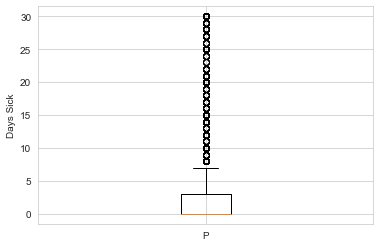

In [921]:
fig, ax = plt.subplots()
ax.boxplot(df['PHYSHLTH'])
ax.set_xticklabels('PHYSHLTH')
ax.set_ylabel('Days Sick')
plt.show()
# sns.set_style("ticks")
# sns.boxplot(y = df['PHYSHLTH'], saturation =1, width=.2)

# ax.set_xlabel('P')
# ax.set_ylabel('Days Sick')


Text(0.5, 0, 'Sick Days')

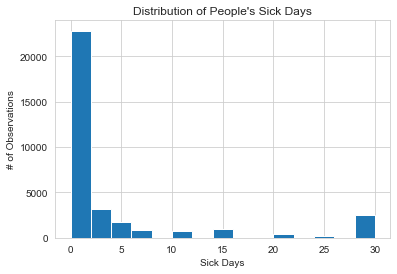

In [683]:
# graphic the distribution of data
plt.hist(df['PHYSHLTH'], bins=15)
plt.title("Distribution of People's Sick Days")
plt.ylabel('# of Observations')
plt.xlabel('Sick Days')


## 3. Generate a graphic that compares the average number of sick days for each state. 

In [684]:
# code to calculate the average number of sick days by state
df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

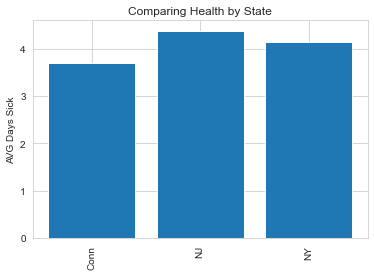

In [685]:
means = df.groupby('_STATE')['PHYSHLTH'].mean().values
states = ['Conn', 'NJ', 'NY']
fig, ax = plt.subplots()
ax.bar(states, means)
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

In [686]:
# # code to graph those averages using matplotlib
# avg_sick_days_by_state = {'Conn': 3.688562, 'NJ': 4.380957, 'NY': 4.148030}
# state = list(avg_sick_days_by_state.keys())
# days_sick = list(avg_sick_days_by_state.values())
# plt.bar(state, days_sick)
# plt.ylabel('AVG DAYS SICK')
# plt.title('Comparing Health by State')

# # ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)

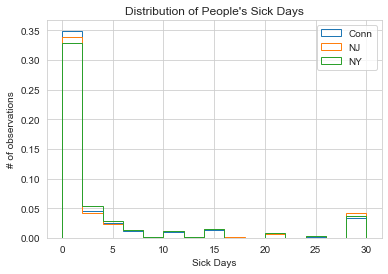

In [687]:
fig,ax=plt.subplots()
ax.hist(df[df['_STATE']==9]['PHYSHLTH'], bins=15, density=True, histtype='step', label='Conn')
ax.hist(df[df['_STATE']==34]['PHYSHLTH'], bins=15, density=True, histtype='step', label='NJ')
ax.hist(df[df['_STATE']==36]['PHYSHLTH'], bins=15, density=True, histtype='step', label='NY')
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()
plt.show()

#DENSITY = TRUE
#HISTTYPE-'STEP'

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [688]:
def is_Chronic(df):
    if df['PHYSHLTH'] > 10:
        return 1
    else:
        return 0
df['CHRON_SICK'] = df.apply(is_Chronic, axis=1)

In [689]:
# code to create new colum for chronically sick
df['CHRONIC'] = np.where(df['PHYSHLTH']>=15, 1 , 0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [690]:

df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.103428
34.0    0.127335
36.0    0.115948
Name: CHRONIC, dtype: float64

In [691]:
# code to calculate averages per state
chronic_means = df.groupby('_STATE')['CHRONIC'].mean().values
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.103428
34.0    0.127335
36.0    0.115948
Name: CHRONIC, dtype: float64

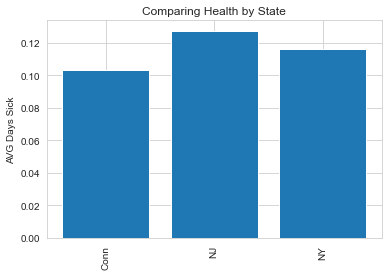

In [692]:

# create graphic to compare chronically sick by state
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(states, chronic_means)

# Set labels and title
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

In [693]:
# # create graphic to compare chronically sick by state
# chronically_sick = {'Conn': 0.110880, 'NJ': 0.134011, 'NY': 0.122949}
# state = list(chronically_sick.keys())
# avg_days_sick = list(chronically_sick.values())
# plt.bar(state, avg_days_sick)
# plt.ylabel('AVG DAYS SICK')
# plt.title('Comparing Health by State')

#portional t-test to deduce statistical significance/explanation/difference

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [694]:
df.shape

(33747, 360)

In [695]:
df['SMOKDAY2'].value_counts()


3.0    9494
1.0    2611
2.0    1336
9.0      21
7.0       6
Name: SMOKDAY2, dtype: int64

In [696]:
df['SMOKDAY2'].value_counts().sum()


13468

In [697]:
df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])


In [698]:
df['smoking'].value_counts().sum()


32153

In [699]:
df['smoking'] = np.where(df['SMOKE100']==7, 7, df['smoking'])
df['smoking'] = np.where(df['SMOKE100']==9, 9, df['smoking'])

In [700]:
df['smoking'].count()


32359

In [701]:
df['smoking'].describe()


count    32359.000000
mean         2.830217
std          0.700878
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: smoking, dtype: float64

In [702]:
smoking_avg = df['smoking'].value_counts()/df['smoking'].count()
smoking_avg

3.0    0.870824
1.0    0.080689
2.0    0.041287
7.0    0.005161
9.0    0.002040
Name: smoking, dtype: float64

In [703]:

smoking_avg.index

Float64Index([3.0, 1.0, 2.0, 7.0, 9.0], dtype='float64')

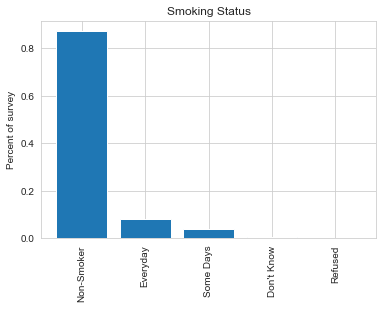

In [704]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], smoking_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Percent of survey")
ax.set_title('Smoking Status')

plt.show()

In [705]:
#############pd.crosstab#########
df.groupby(['_STATE', 'smoking'])['smoking'].count()


_STATE  smoking
9.0     1.0         706
        2.0         344
        3.0        8870
        7.0          65
        9.0          26
34.0    1.0         901
        2.0         480
        3.0        9595
        7.0          74
        9.0          14
36.0    1.0        1004
        2.0         512
        3.0        9714
        7.0          28
        9.0          26
Name: smoking, dtype: int64

In [706]:
df.groupby(['_STATE', 'smoking']).agg({'smoking': 'count'})


smoking
_STATE smoking         
9.0    1.0          706
       2.0          344
       3.0         8870
       7.0           65
       9.0           26
34.0   1.0          901
       2.0          480
       3.0         9595
       7.0           74
       9.0           14
36.0   1.0         1004
       2.0          512
       3.0         9714
       7.0           28
       9.0           26

In [707]:
state_smoking = df.groupby(['_STATE', 'smoking']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts = state_smoking.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [708]:
state_pcts


smoking
_STATE smoking           
9.0    1.0       7.052243
       2.0       3.436220
       3.0      88.602537
       7.0       0.649286
       9.0       0.259714
34.0   1.0       8.143529
       2.0       4.338395
       3.0      86.722704
       7.0       0.668836
       9.0       0.126537
36.0   1.0       8.897554
       2.0       4.537398
       3.0      86.086494
       7.0       0.248139
       9.0       0.230415

In [709]:
state_pcts.unstack()


smoking                                         
smoking       1.0       2.0        3.0       7.0       9.0
_STATE                                                    
9.0      7.052243  3.436220  88.602537  0.649286  0.259714
34.0     8.143529  4.338395  86.722704  0.668836  0.126537
36.0     8.897554  4.537398  86.086494  0.248139  0.230415

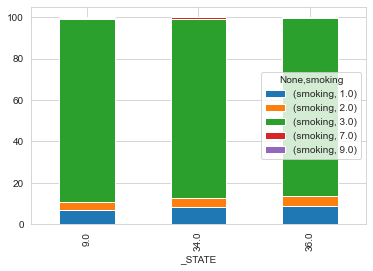

In [710]:
state_pcts.unstack().plot(kind='bar', stacked=True)


In [711]:
zero_dict = {3:'non', 
            2: 'some',
            1: 'every',
            7: 'unknown',
            9: 'unknown'}

df['smoking_cat'] = df['smoking'].replace(zero_dict)

In [712]:
df['smoking_cat']


49938         non
49939         non
49940         non
49941         non
49942         non
           ...   
303774      every
303775        non
303776        non
303777    unknown
303778        non
Name: smoking_cat, Length: 33747, dtype: object

In [713]:

state_smoking_cat = df.groupby(['_STATE', 'smoking_cat']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts_cat = state_smoking_cat.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts_cat.index.set_levels(['Conn', 'NJ', 'NY'], level=0, inplace=True)
state_pcts_cat

smoking
_STATE smoking_cat           
Conn   every         7.052243
       non          88.602537
       some          3.436220
       unknown       0.909000
NJ     every         8.143529
       non          86.722704
       some          4.338395
       unknown       0.795372
NY     every         8.897554
       non          86.086494
       some          4.537398
       unknown       0.478554

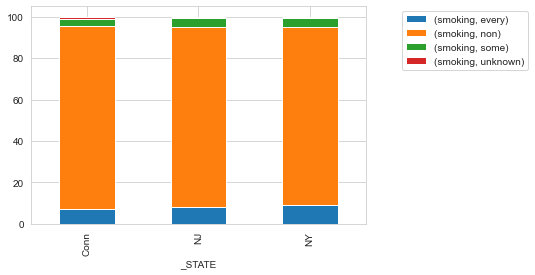

In [714]:
ax = state_pcts_cat.unstack().plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

In [715]:

cat_avg = df.groupby('smoking_cat')['PHYSHLTH'].mean()
cat_std = df.groupby('smoking_cat')['PHYSHLTH'].std()
cat_avg

smoking_cat
every      6.653007
non        3.764435
some       6.295659
unknown    4.081545
Name: PHYSHLTH, dtype: float64

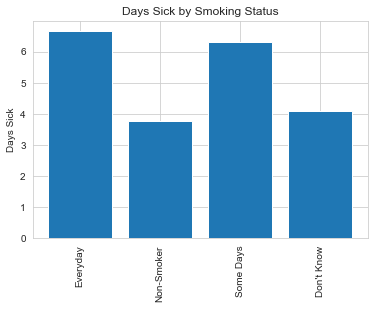

In [716]:
 #code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Every', 'Non', 'Some',"unkonw"], cat_avg)

# Set title and lables
ax.set_xticklabels(['Everyday', 'Non-Smoker',  'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Days Sick")
ax.set_title('Days Sick by Smoking Status')

plt.show()

In [717]:
# your code here

In [718]:
#graph showing the breakdown of smokers per state

In [719]:
# code to graph these averages sick days for each category of smoking status

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [720]:
# code here to clean up the ALCDAY5 responses
alc_dict = {888:0, 
            777: np.nan,
            999: np.nan
            }

df['alcohol'] = df['ALCDAY5'].replace(alc_dict)

In [721]:
df['alcohol']


49938     101.0
49939     230.0
49940       0.0
49941     103.0
49942     101.0
          ...  
303774    203.0
303775      0.0
303776    204.0
303777      NaN
303778    230.0
Name: alcohol, Length: 33747, dtype: float64

In [722]:
# create a function called times100
def calc_monthly(x):
    if x>200:
        return x-200
    elif x>100:
        return min((x-100)*4.34524, 30)
    else:
        return x

In [723]:
df['alcohol']= df['alcohol'].apply(calc_monthly)

In [724]:

df['alcohol'].describe()

count    31532.000000
mean         5.495244
std          8.423029
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: alcohol, dtype: float64

/Users/jefelito/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jefelito/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


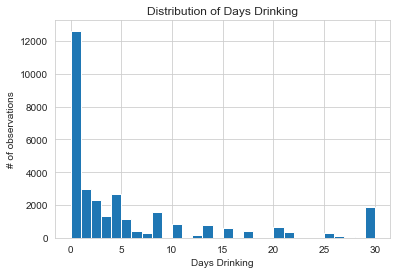

In [725]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['alcohol'], bins=30)

ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of Days Drinking")

plt.show()

In [726]:

# code to calculate averages per state
alcohol_state = df.groupby('_STATE')['alcohol'].mean().values
df.groupby('_STATE')['alcohol'].mean()

_STATE
9.0     6.199627
34.0    5.057856
36.0    5.301178
Name: alcohol, dtype: float64

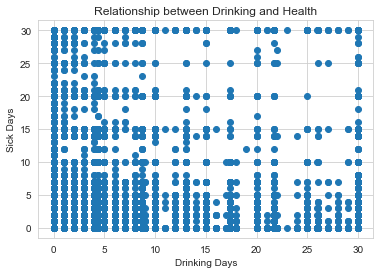

In [727]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(df["alcohol"], df["PHYSHLTH"])

ax.set_xlabel("Drinking Days")
ax.set_ylabel("Sick Days")
ax.set_title('Relationship between Drinking and Health')


plt.show()


In [728]:
df[['PHYSHLTH', 'alcohol']].corr()['PHYSHLTH'] #two continuous variables correlation 

PHYSHLTH    1.000000
alcohol    -0.091154
Name: PHYSHLTH, dtype: float64

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

-  Create a 95% confidence interval for the true proportion of chronically sick people.

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4? do you think the pop mean is 4.
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


In [729]:
# hypothesis is that the pop mean is 4  
# t test with two population means

### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

In [730]:
#chisquared

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.

Statistics

In [773]:
zero_dict = {88:0, 
            77: np.nan,
            99: np.nan
            }

df['MENTHLTH'] = df['MENTHLTH'].replace(zero_dict)
df.dropna(subset=['MENTHLTH'], inplace=True)
df['MENTHLTH'].describe()

count    33892.000000
mean         3.464003
std          7.755965
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: MENTHLTH, dtype: float64

CI -population mean

In [774]:
n= len(df['MENTHLTH'])

con_coef = .95

alpha = 1. - con_coef

In [775]:
x_bar = df['MENTHLTH'].mean()
x_bar

3.4640033046146583

In [776]:
sigma = df['MENTHLTH'].std()
sigma

7.755965406145017

In [777]:
standard_error = sigma / math.sqrt(n)
standard_error

0.04212959308651134

In [778]:
z_critical = stats.norm.ppf(q = .975)
z_critical

1.959963984540054

In [779]:
z_interval = stats.norm.interval(alpha=con_coef)
z_interval

(-1.959963984540054, 1.959963984540054)

In [780]:
CI_lower = x_bar - z_critical * standard_error
CI_upper = x_bar + z_critical * standard_error
CI_lower, CI_upper

(3.3814308194817686, 3.546575789747548)

Two sample test of means for gender

In [870]:
zero_dict = {9:np.nan}
             
df['SEX'] = df['SEX'].replace(zero_dict)
df.dropna(subset=['SEX'], inplace=True)

In [871]:
df['SEX']

49938     2.0
49939     1.0
49940     2.0
49941     2.0
49942     2.0
         ... 
303773    2.0
303774    1.0
303775    2.0
303776    1.0
303778    1.0
Name: SEX, Length: 30115, dtype: float64

In [872]:
male = df.groupby('SEX').MENTHLTH.get_group(1)
female = df.groupby('SEX').MENTHLTH.get_group(2)
print(male.describe())
print(female.describe())


count    13185.000000
mean        66.709670
std         34.995525
min          1.000000
25%         30.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: MENTHLTH, dtype: float64
count    16930.000000
mean        61.023272
std         37.264178
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: MENTHLTH, dtype: float64


In [873]:
stats.ttest_ind(male,female)

Ttest_indResult(statistic=13.491081220998595, pvalue=2.3280686954397885e-41)

One-way ANOVA

In [874]:
df['_AGE_G'].value_counts()

6.0    10366
5.0     6923
4.0     5167
3.0     3296
2.0     2808
1.0     1555
Name: _AGE_G, dtype: int64

In [875]:
df.dropna(axis=0, subset=['MENTHLTH'], inplace=True)


In [876]:
df['_AGE_G'] = df['_AGE_G'].apply(lambda x: 'Age 18 to 24' if x == 1 else ('Age 25 to 34' if x == 2 else ('Age 35 to 44' if x ==3 else ('Age 45 to 54' if x ==4 else ('Age 55 to 64' if x ==5 else ('Age 65 or older'))))))

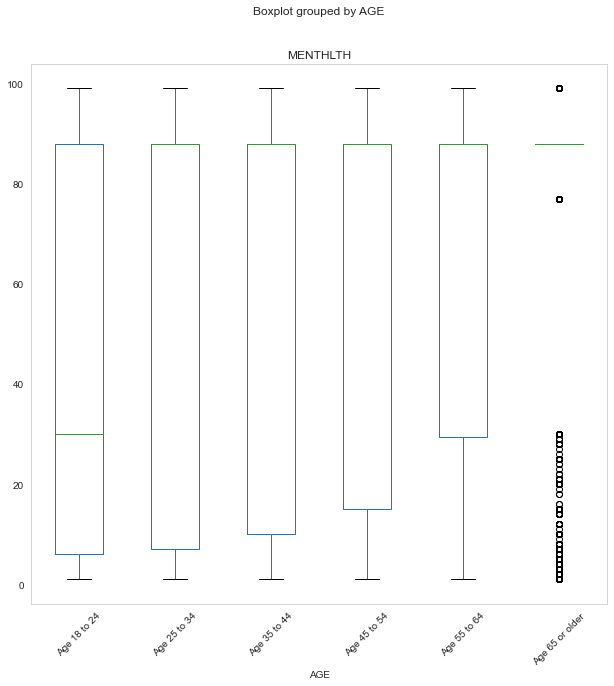

In [877]:
df['AGE'] = df['_AGE_G']
sns.set_style("whitegrid")
df.boxplot('MENTHLTH', by = 'AGE', rot=45, figsize=(10,10), grid=False)


In [878]:
anova_age = ols('MENTHLTH ~ _AGE_G', data=df).fit()
anova_age

In [879]:
anova_age_table = sm.stats.anova_lm(anova_age, type=2)
print(anova_age_table)

               df        sum_sq        mean_sq           F         PR(>F)
_AGE_G        5.0  1.438099e+06  287619.872715  225.192329  8.724388e-237
Residual  30109.0  3.845578e+07    1277.218784         NaN            NaN


CI - population proportion

In [880]:
df['PHY_ACT_GL'] = df['_PAINDX1']
zero_dict = {9:np.nan}
             
df['PHY_ACT_GL'] = df['PHY_ACT_GL'].replace(zero_dict)
df.dropna(subset=['PHY_ACT_GL'], inplace=True)
print(df['PHY_ACT_GL'].count())

30115


In [854]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(count=30115,
                   nobs=34545,
                   alpha=(1 - 0.95))

(0.8682356224928239, 0.8752873185985063)

Two proportions z-test using gender

H0 = p1 - p2 = 0
Ha = p1 - p2 != 0

In [899]:
df['PHY_ACT_GL'] = df['PHY_ACT_GL'].apply(lambda x: 'Met Aerobic Guidelines' if x == 1 else ('Did Not Meet Aerobic Guidelines'))

In [900]:
met_gl = df.groupby('PHY_ACT_GL').SEX.get_group(1)
did_not_meet_gl = df.groupby('PHY_ACT_GL').SEX.get_group(2)
print(met_gl.describe())
print(did_not_meet_gl.describe())

KeyError: 1

In [892]:
print(met_gl)

49939              Met Aerobic Guidelines
49945              Met Aerobic Guidelines
49951              Met Aerobic Guidelines
49953     Did Not Meet Aerobic Guidelines
49954     Did Not Meet Aerobic Guidelines
                       ...               
303771    Did Not Meet Aerobic Guidelines
303772    Did Not Meet Aerobic Guidelines
303774    Did Not Meet Aerobic Guidelines
303776    Did Not Meet Aerobic Guidelines
303778    Did Not Meet Aerobic Guidelines
Name: PHY_ACT_GL, Length: 13185, dtype: object


In [822]:
df['PHY_ACT_GL']

49938     Did Not Meet Aerobic Guidelines
49939              Met Aerobic Guidelines
49940     Did Not Meet Aerobic Guidelines
49941              Met Aerobic Guidelines
49942              Met Aerobic Guidelines
                       ...               
303773    Did Not Meet Aerobic Guidelines
303774    Did Not Meet Aerobic Guidelines
303775    Did Not Meet Aerobic Guidelines
303776    Did Not Meet Aerobic Guidelines
303778    Did Not Meet Aerobic Guidelines
Name: PHY_ACT_GL, Length: 29645, dtype: object

In [ ]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(count=12992,
                   nobs=29645,
                   alpha=(1 - 0.95))

In [ ]:
proportion_confint(count=16653,
                   nobs=29645,
                   alpha=(1 - 0.95))

In [ ]:
The value of z is -14.4367. The value of p ims < .00001. The result is significant at p < .05.

Chi-Squared

H0 = There is an evenly distributed amount of people who did and did not meet aerobics guidelines in age groups.

In [922]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [923]:
from scipy.stats import chi2_contingency
table = [[20, 30, 15], [20,  15,  30]]
stat, p, dof, expected = chi2_contingency(table)
alpha = 0.05
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

Variables are associated (reject H0)
